In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
iris = datasets.load_iris()
num_sample, num_feature = iris.data.shape

print('Number of samples:\t{}'.format(num_sample))
print('Number of features:\t{}'.format(num_feature))

#\t : 다음 단어로, \n : 다음 줄로

print('Feature names:\n', iris.feature_names)

Number of samples:	150
Number of features:	4
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
X = iris.data # 데이터 특성
y = iris.target # 데이터의 결과값(꽃의 종류)

In [13]:
X[:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [17]:
print('label count of y:', np.bincount(y)) #bincount = binary count : 클래스(각 꽃의 종류)들의 숫자를 새어줌
print('label count of y_train:', np.bincount(y_train))
print('label count of y_test:', np.bincount(y_test))

label count of y: [50 50 50]
label count of y_train: [35 35 35]
label count of y_test: [15 15 15]


# clf : Classifier 

In [18]:
clf = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=4, 
                                    random_state=1)

# criterion에 교차 entropy도 넣어서 의사결정나무 그려보기
# max_depth : 나무 아래 몇개까지 있는지
# 한 노드에 같은 클래스만 있을때 gini지수 = 0

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

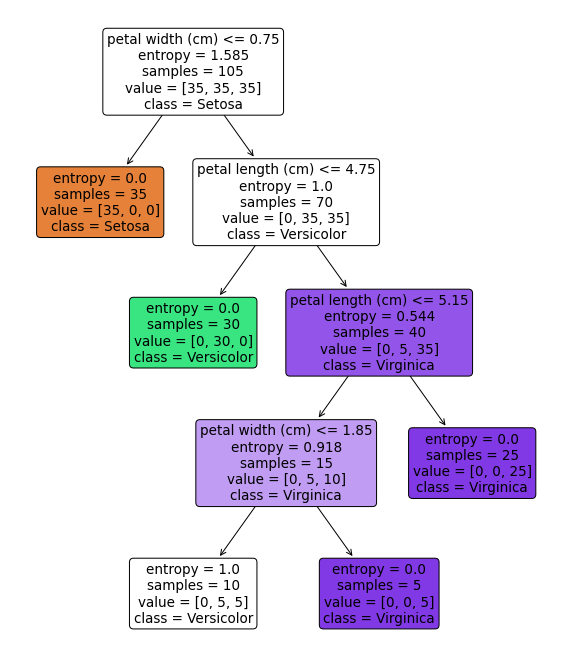

In [19]:
plt.figure(figsize=(10,12))
tree.plot_tree(clf,
               impurity=True, # 불순도(한 노드에 있는 서로다른 클래스)를 낮추고 노드의 온도를 높임
               filled=True,  # 노드에 색깔 칠하기
               rounded=True,
               class_names=['Setosa', 'Versicolor', 'Virginica'],
               feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()

# 두 한 노드의 class의 숫자가 같을때는 둘 중 랜덤으로 하나를 class로 분류함

In [20]:
fn = iris.feature_names
fi = np.round(clf.feature_importances_, 2)

In [21]:
print('features:\n\t{}'.format(fn))
print('feature importance:\n\t{}'.format(fi)) #feature importance에서의 값이 클수로 그 feature이 분류를 더 잘함

features:
	['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature importance:
	[0.   0.   0.36 0.64]


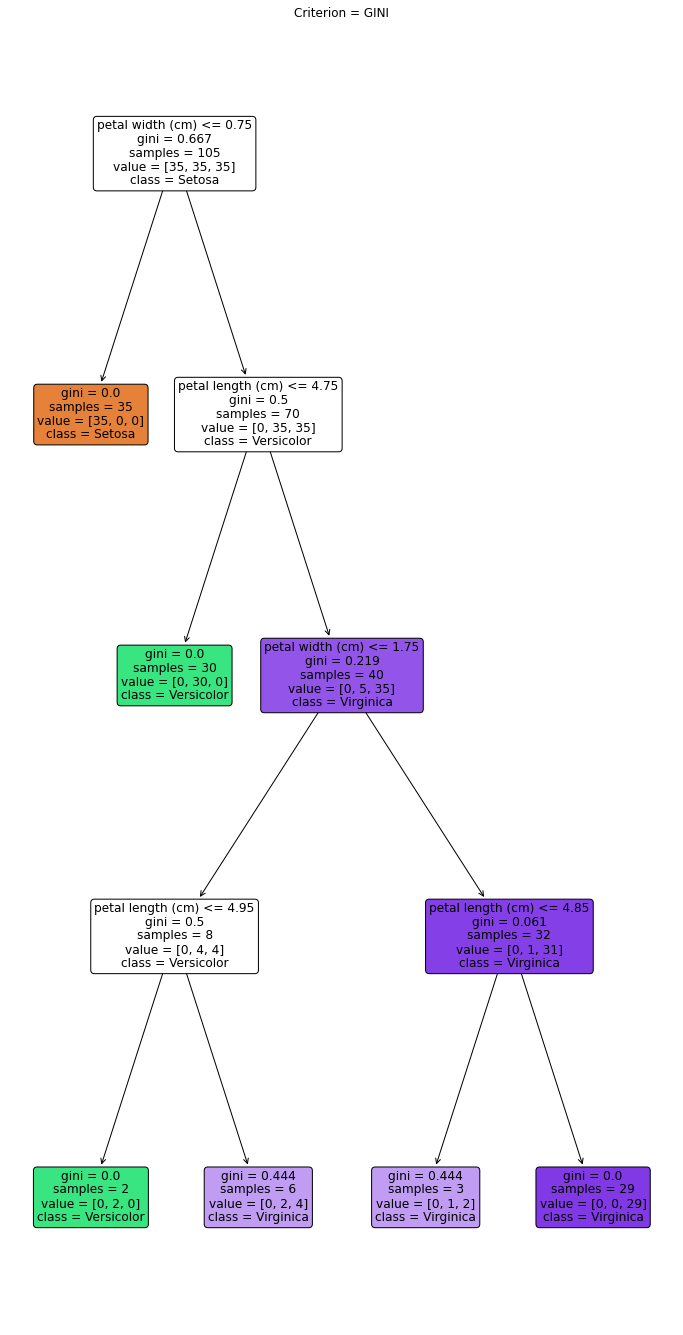

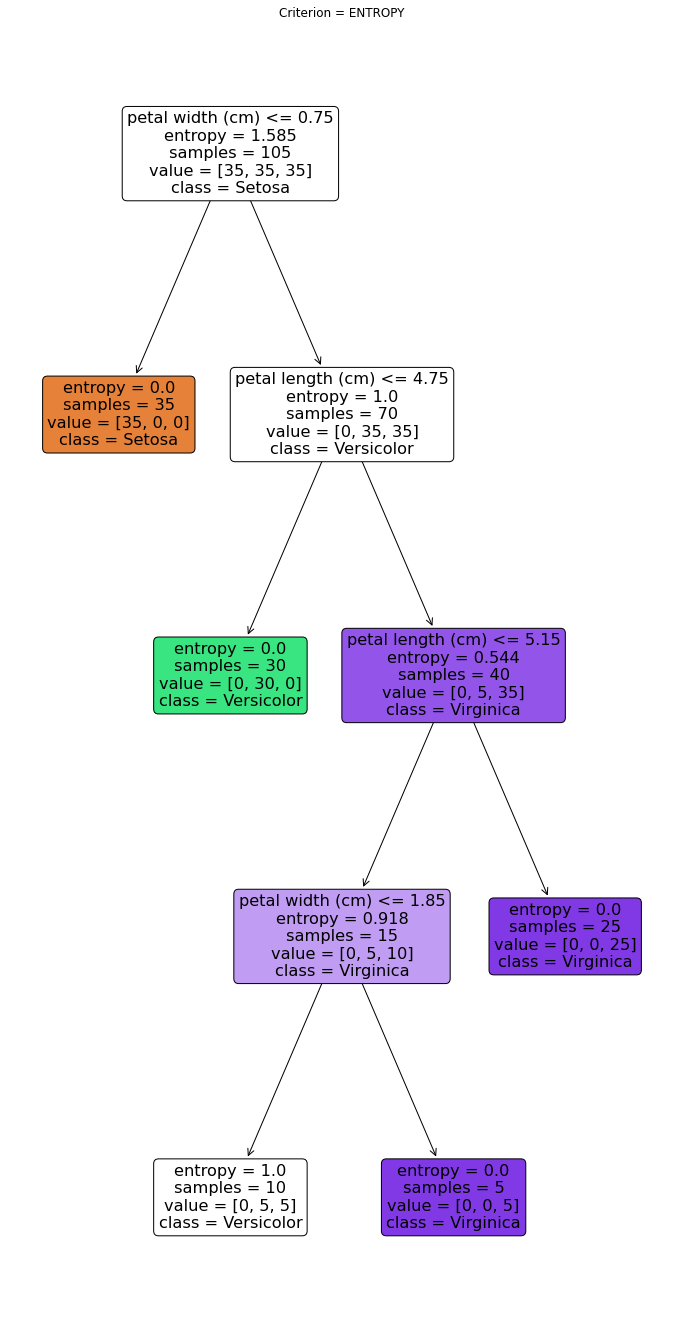

In [23]:
criterion = ['gini', 'entropy']

for i in range(2):
    clf = DecisionTreeClassifier(criterion=criterion[i], 
                                    max_depth=4, 
                                    random_state=1)
    clf.fit(X_train, y_train)
    fn = iris.feature_names
    fi = np.round(clf.feature_importances_, 2)
    
    plt.figure(figsize=(12,24))
    tree.plot_tree(clf,
               impurity=True, # 불순도(한 노드에 있는 서로다른 클래스)를 낮추고 노드의 온도를 높임
               filled=True,  # 노드에 색깔 칠하기
               rounded=True,
               class_names=['Setosa', 'Versicolor', 'Virginica'],
               feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
    plt.title("Criterion = " + criterion[i].upper())
plt.show()

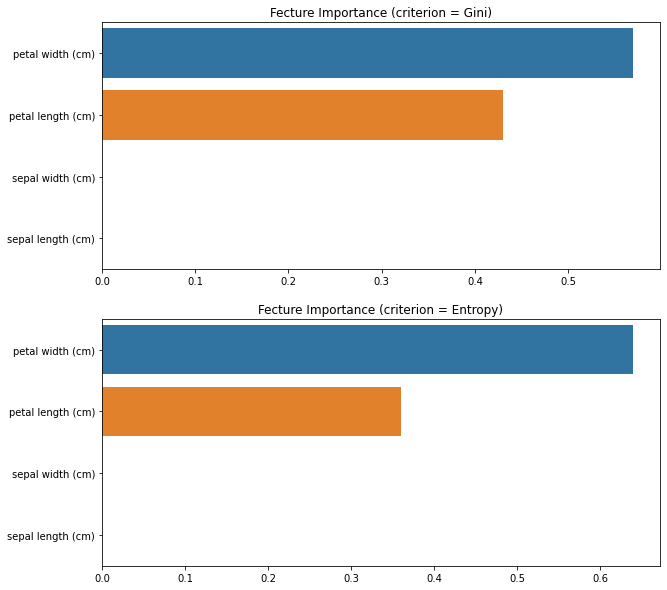

In [26]:
criterion = ['gini', 'entropy']
fi = [[range(num_feature)],[range(num_feature)]]
fig, axes = plt.subplots(2,1, figsize = (10,10), sharey = False)

for i in range(2):
    clf = DecisionTreeClassifier(criterion=criterion[i], 
                                    max_depth=4, 
                                    random_state=1)
    clf.fit(X_train, y_train)
    fn = iris.feature_names
    fis = np.round(clf.feature_importances_, 2)
    fi[i] = sorted(np.round(clf.feature_importances_, 2),reverse = True)
    fns = [x for _, x in sorted(zip(fis, fn), reverse = True)]
    sns.barplot(ax = axes[i], x = fi[i], y = fns)
    axes[i].set_title("Fecture Importance (criterion = " + criterion[i].capitalize() + ")")
    axes[i].tick_params(axis='y', labelrotation=0)
    
plt.show()

# Petal width가 3가지 꽃의 종류를 분류하는데 Petal length보다 더 큰 영향력을 미친다. 또한 Sepal 변수일 경우 max_depth가 4일경우 꽃의 종류를 분류하는데 아무런 영향을 미치지 못했다.